In [1]:
import pybamm
import matplotlib.pyplot as plt
from electrode_coating.models import PowerLaw

model = PowerLaw()

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": 2,
        "Yield stress [Pa]": 2,
        "Exponent parameter [t]": 3,
        "Coating gap [m]": 4,
        "Coating speed [m.s-1]": 10,
        "Newtonian viscosity [Pa]": 3,
        "Shear strain [s-1]": 1,
        "Integration constant 1": 1,
        "Integration constant 2": 1,
        "Power-law index": 2,

    }
)

sim = pybamm.Simulation(model, parameter_values=param)
sol = sim.solve([0, 1])

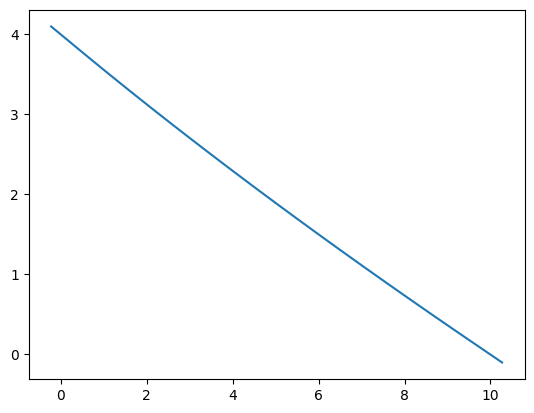

In [2]:
# Plot velocity profile
y = sol["y [m]"](t=0)
u = sol["Velocity [m.s-1]"](t=0)

plt.plot(u, y)

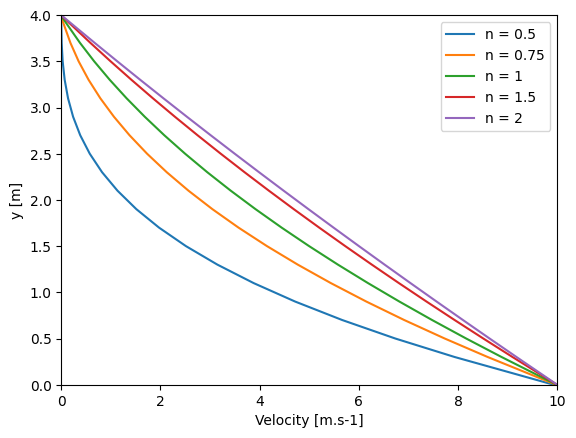

In [3]:
# Try different indices
n_list = [0.5, 0.75, 1, 1.5, 2]
y = model.variables["y [m]"]
velocity_list = []

param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": 2,
        "Yield stress [Pa]": 2,
        "Exponent parameter [t]": 3,
        "Coating gap [m]": 4,
        "Coating speed [m.s-1]": 10,
        "Newtonian viscosity [Pa]": 3,
        "Shear strain [s-1]": 1,
        "Integration constant 1": 1,
        "Integration constant 2": 1,
        "Power-law index": "[input]",

    }
)

sim = pybamm.Simulation(model, parameter_values=param)

plt.figure()

for n in n_list:
    sol = sim.solve([0, 1], inputs={"Power-law index": n})
    velocity_list.append(sol["Velocity [m.s-1]"](t=0))
    plt.plot(sol["Velocity [m.s-1]"](t=0), sol["y [m]"](t=0), label=f"n = {n}")

plt.xlabel("Velocity [m.s-1]")
plt.ylabel("y [m]")
plt.xlim([0, param["Coating speed [m.s-1]"]])
plt.ylim([0, param["Coating gap [m]"]])
plt.legend()
